In [1]:
#ElhamMirzaei
#First Dataset
#Regression
#With Preprocessing
import warnings
warnings.filterwarnings("ignore")
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import re
from sklearn import datasets
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from math import sqrt
%matplotlib inline

In [2]:
#reading our data
cdf=pd.read_csv("HousePrice1.csv")
#finding information of the dataframe
cdf.info()
#finding the shape of the dataframe
cdf.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3189 non-null   int64  
 1   Room       3189 non-null   int64  
 2   Parking    3189 non-null   bool   
 3   Warehouse  3189 non-null   bool   
 4   Elevator   3189 non-null   bool   
 5   Address    3115 non-null   float64
 6   PriceR     3189 non-null   int64  
 7   PriceM     3189 non-null   float64
 8   PriceMC    3189 non-null   float64
dtypes: bool(3), float64(3), int64(3)
memory usage: 159.0 KB


(3189, 9)

In [3]:
#Remove the null values (houses without Address)
df = cdf.dropna()
#remove outliers of Area(less than 25 & more than 200)
df.loc[:, 'Area'] = pd.to_numeric(df['Area'], errors='coerce')
df.loc[:, 'Area'] = df.loc[:, 'Area'].apply(lambda x: x if (x >= 30 and x <= 200) else np.nan)
df = df.dropna(subset=['Area'])

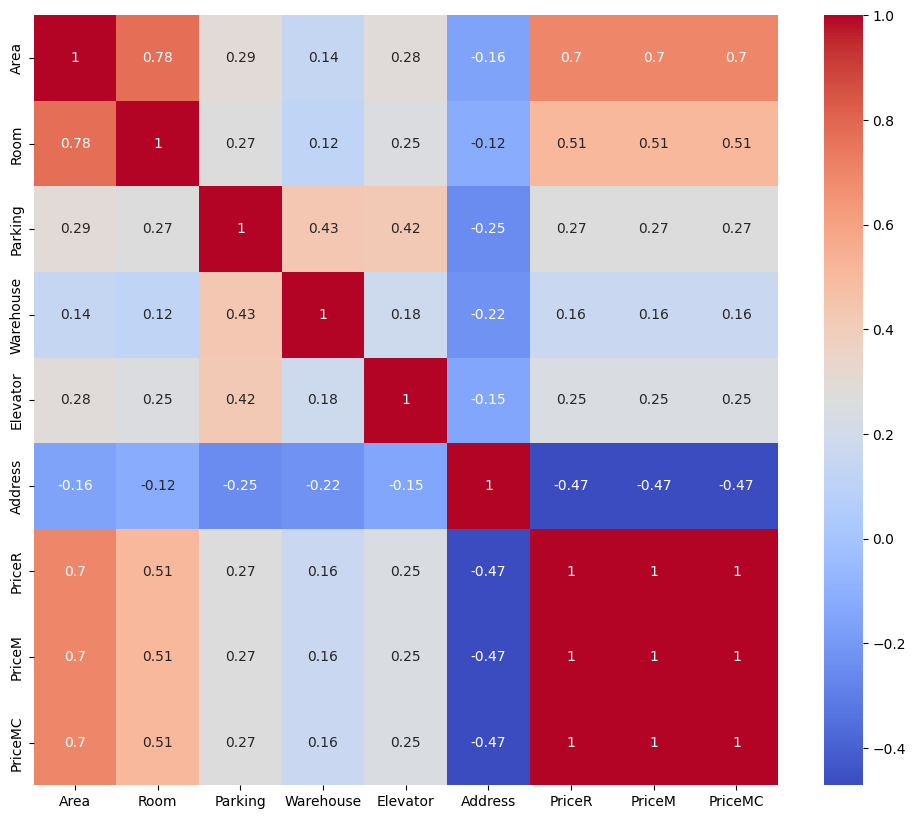

In [4]:
#Heat map visualization
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [5]:
#train=80% & test=20%
msk = np.random.rand(len(cdf)) <= 0.8
train = cdf[msk]
test = cdf[~msk]
x=df.drop('PriceMC',axis=1)
y=df['PriceMC']

In [6]:
df=df.dropna().reset_index(drop=True)
df=df[['Area','Room','Parking','Warehouse','Elevator','Address','PriceMC']]

In [7]:
correlations = df.corr()['PriceMC'].sort_values(ascending=False)
print(correlations)

PriceMC      1.000000
Area         0.699957
Room         0.510125
Parking      0.269560
Elevator     0.245613
Warehouse    0.159759
Address     -0.471520
Name: PriceMC, dtype: float64


In [8]:
correlations = df.corr()['PriceMC']
correlations = correlations.drop(['Address', 'PriceMC'])
correlations = correlations[correlations > 0]
total_correlation = correlations.sum()
weights = correlations / total_correlation
print(weights)

Area         0.371327
Room         0.270621
Parking      0.143002
Warehouse    0.084752
Elevator     0.130297
Name: PriceMC, dtype: float64


In [9]:
x['Area'] *= 0.370968
x['Room'] *= 0.270466
x['Parking'] *= 0.142979
x['Warehouse'] *= 0.084976
x['Elevator'] *= 0.130611

In [10]:
# آموزش مدل
regr = LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['PriceMC']])
# پیش‌بینی با مدل
test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['PriceMC']])
r2_scores = []
mse_scores = []
rmse_scores = []
mae_scores = []

for _ in range(100):
    regr.fit(train_x , train_y)
    test_y_ = regr.predict(test_x)
    # محاسبه خطاها
    mse = mean_squared_error(test_y, test_y_)
    rmse = sqrt(mse)
    mae = mean_absolute_error(test_y, test_y_)
    r2 = r2_score(test_y, test_y_)
    # ذخیره خطاها
    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
# محاسبه و چاپ میانگین خطاها
print("Average R2 Score: %.2f" % (sum(r2_scores) / len(r2_scores)))
print("Average Mean Squared Error (MSE): %.2f" % (sum(mse_scores) / len(mse_scores)))
print("Average Root Mean Squared Error (RMSE): %.2f" % (sum(rmse_scores) / len(rmse_scores)))
print("Average Mean Absolute Error (MAE): %.2f" % (sum(mae_scores) / len(mae_scores)))

Average R2 Score: 0.53
Average Mean Squared Error (MSE): 193703930.21
Average Root Mean Squared Error (RMSE): 13917.76
Average Mean Absolute Error (MAE): 7556.88


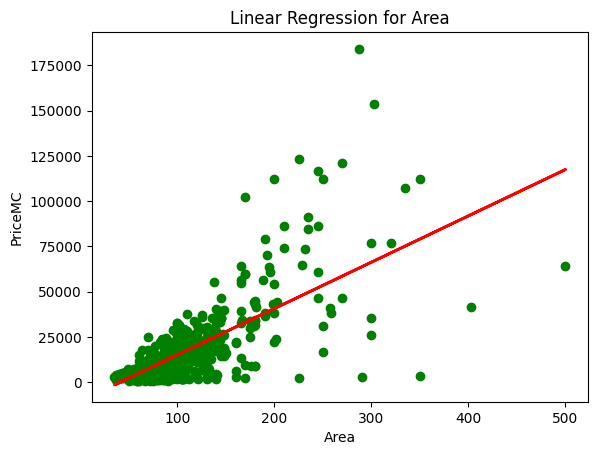

In [11]:
# آموزش مدل و پیش‌بینی
regr.fit(train_x , train_y)
test_y_ = regr.predict(test_x)
feature_index = 0  # ایندکس ویژگی "Area" در آرایه ورودی
plt.scatter(test_x[:, feature_index], test_y, color='green')
plt.plot(test_x[:, feature_index], test_y_, color='red', linewidth=2)
plt.xlabel('Area')
plt.ylabel('PriceMC')
plt.title('Linear Regression for Area')
plt.show()

In [12]:
# آموزش مدل
regr = LinearRegression()
train_x = np.asanyarray(train[['Room']])
train_y = np.asanyarray(train[['PriceMC']])
# پیش‌بینی با مدل
test_x = np.asanyarray(test[['Room']])
test_y = np.asanyarray(test[['PriceMC']])
r2_scores = []
mse_scores = []
rmse_scores = []
mae_scores = []

for _ in range(100):
    regr.fit(train_x , train_y)
    test_y_ = regr.predict(test_x)
    # محاسبه خطاها
    mse = mean_squared_error(test_y, test_y_)
    rmse = sqrt(mse)
    mae = mean_absolute_error(test_y, test_y_)
    r2 = r2_score(test_y, test_y_)
    # ذخیره خطاها
    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
# محاسبه و چاپ میانگین خطاها
print("Average R2 Score: %.2f" % (sum(r2_scores) / len(r2_scores)))
print("Average Mean Squared Error (MSE): %.2f" % (sum(mse_scores) / len(mse_scores)))
print("Average Root Mean Squared Error (RMSE): %.2f" % (sum(rmse_scores) / len(rmse_scores)))
print("Average Mean Absolute Error (MAE): %.2f" % (sum(mae_scores) / len(mae_scores)))

Average R2 Score: 0.28
Average Mean Squared Error (MSE): 297695828.65
Average Root Mean Squared Error (RMSE): 17253.86
Average Mean Absolute Error (MAE): 12253.28


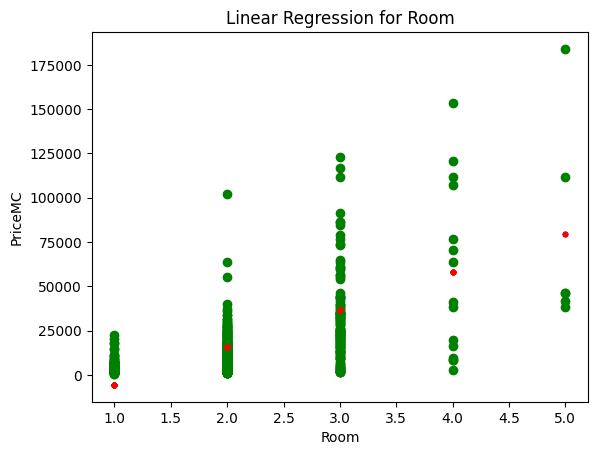

In [13]:
# آموزش مدل و پیش‌بینی
regr.fit(train_x , train_y)
test_y_ = regr.predict(test_x)
feature_index = 0  # ایندکس ویژگی "Room" در آرایه ورودی
plt.scatter(test_x[:, feature_index], test_y, color='green')
plt.plot(test_x[:, feature_index], test_y_, '.', color='red')
plt.xlabel('Room')
plt.ylabel('PriceMC')
plt.title('Linear Regression for Room')
plt.show()

In [14]:
# آموزش مدل
regr = LinearRegression()
train_x = np.asanyarray(train[['Area','Room']])
train_y = np.asanyarray(train[['PriceMC']])
# پیش‌بینی با مدل
test_x = np.asanyarray(test[['Area','Room']])
test_y = np.asanyarray(test[['PriceMC']])
r2_scores = []
mse_scores = []
rmse_scores = []
mae_scores = []

for _ in range(100):
    regr.fit(train_x , train_y)
    test_y_ = regr.predict(test_x)
    # محاسبه خطاها
    mse = mean_squared_error(test_y, test_y_)
    rmse = sqrt(mse)
    mae = mean_absolute_error(test_y, test_y_)
    r2 = r2_score(test_y, test_y_)
    # ذخیره خطاها
    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
# محاسبه و چاپ میانگین خطاها
print("Average R2 Score: %.2f" % (sum(r2_scores) / len(r2_scores)))
print("Average Mean Squared Error (MSE): %.2f" % (sum(mse_scores) / len(mse_scores)))
print("Average Root Mean Squared Error (RMSE): %.2f" % (sum(rmse_scores) / len(rmse_scores)))
print("Average Mean Absolute Error (MAE): %.2f" % (sum(mae_scores) / len(mae_scores)))

Average R2 Score: 0.50
Average Mean Squared Error (MSE): 204906877.57
Average Root Mean Squared Error (RMSE): 14314.57
Average Mean Absolute Error (MAE): 8856.66


In [15]:
# تعریف نام‌های ستون برای پنج ویژگی
columns = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']
# انتخاب فقط پنج ستون مورد نظر برای X
X = df[columns].values
# استفاده از ستون 'PriceMC' به عنوان y
y = df['PriceMC'].values
# استفاده از SimpleImputer برای پر کردن مقادیر گمشده با میانگین ستون
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []
# تعریف بازه درجات
degrees = range(2,5)

for d in degrees:
    # تبدیل ویژگی‌ها به چندجمله‌ای درجه "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X_imputed)
    # تقسیم داده‌ها به مجموعه‌های آموزش و آزمون
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=101)
    # آموزش مدل روی مجموعه آموزش
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    # پیش‌بینی روی هر دو مجموعه آموزش و آزمون
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    # محاسبه خطاها
    # خطاها روی مجموعه آموزش
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    # خطاها روی مجموعه آزمون
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    # ذخیره خطاها برای رسم نمودار در آینده
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

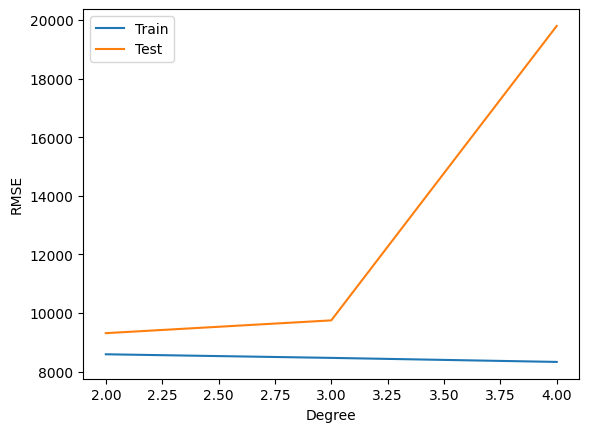

بهترین درجه: 2
درجات به ترتیب از بهترین به بدترین:
درجه 2: RMSE = 9312.086199102363
درجه 3: RMSE = 9748.151140938477
درجه 4: RMSE = 19795.919690083203


In [16]:
# رسم خطاها
plt.plot(degrees, train_rmse_errors, label='Train')
plt.plot(degrees, test_rmse_errors, label='Test')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()
# پیدا کردن درجه با کمترین خطای آزمون RMSE
best_degree = degrees[test_rmse_errors.index(min(test_rmse_errors))]
print(f"بهترین درجه: {best_degree}")
# ایجاد یک دیکشنری برای نگهداری خطای RMSE برای هر درجه
rmse_errors = {degree: error for degree, error in zip(degrees, test_rmse_errors)}
# مرتب‌سازی درجات بر اساس خطای RMSE
sorted_degrees = sorted(rmse_errors, key=rmse_errors.get)
# چاپ درجات به ترتیب از بهترین به بدترین
print("درجات به ترتیب از بهترین به بدترین:")
for degree in sorted_degrees:
    print(f"درجه {degree}: RMSE = {rmse_errors[degree]}")

In [17]:
# تعریف نام‌های ستون برای پنج ویژگی
columns = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']
# تبدیل X و y به DataFrame
df = pd.DataFrame(X, columns=columns)
df['Target'] = pd.Series(y)
# محاسبه ماتریس همبستگی
corr_matrix = df.corr()
# محاسبه همبستگی هر ویژگی با هدف
target_corr = corr_matrix['Target']
# حذف همبستگی هدف با خودش
target_corr = target_corr.drop('Target')
# مرتب‌سازی ویژگی‌ها بر اساس همبستگی با هدف
sorted_corr = target_corr.sort_values(ascending=False)
# انتخاب سه ویژگی با بالاترین همبستگی
top_features = sorted_corr.index[:2]
print(f"دو ویژگی با بالاترین همبستگی: {top_features[0]} (اندیس {df.columns.get_loc(top_features[0])}), {top_features[1]} (اندیس {df.columns.get_loc(top_features[1])})")

دو ویژگی با بالاترین همبستگی: Area (اندیس 0), Room (اندیس 1)


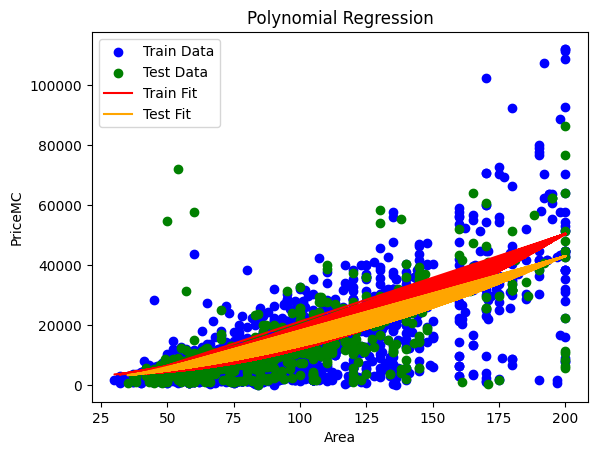

In [18]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
x = df['Area'].values.reshape(-1, 1)  # تبدیل به آرایه دوبعدی
# تقسیم داده به دو بخش آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# محاسبه رگرسیون چندجمله‌ای برای داده آموزش
coefficients_train = np.polyfit(x_train.ravel(), y_train, 2)
polynomial_train = np.poly1d(coefficients_train)
y_fit_train = polynomial_train(x_train.ravel())

# محاسبه رگرسیون چندجمله‌ای برای داده تست
coefficients_test = np.polyfit(x_test.ravel(), y_test, 2)
polynomial_test = np.poly1d(coefficients_test)
y_fit_test = polynomial_test(x_test.ravel())

# رسم نمودار
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x_train, y_fit_train, color='red', label='Train Fit')
plt.plot(x_test, y_fit_test, color='orange', label='Test Fit')
plt.xlabel('Area')
plt.ylabel('PriceMC')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

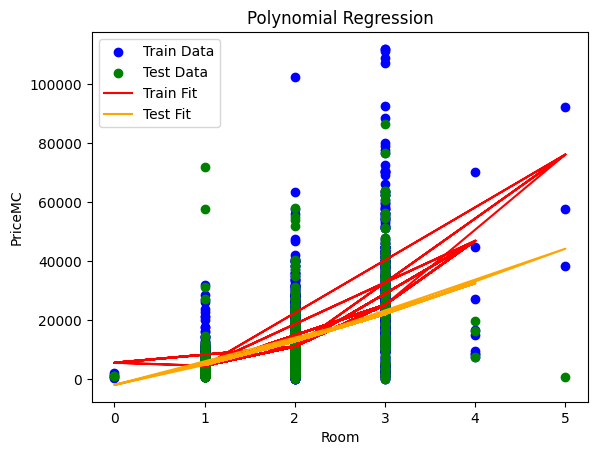

In [19]:
df['Room'] = pd.to_numeric(df['Room'], errors='coerce')
x = df['Room'].values.reshape(-1, 1)  # تبدیل به آرایه دوبعدی
# تقسیم داده به دو بخش آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# محاسبه رگرسیون چندجمله‌ای برای داده آموزش
coefficients_train = np.polyfit(x_train.ravel(), y_train, 2)
polynomial_train = np.poly1d(coefficients_train)
y_fit_train = polynomial_train(x_train.ravel())

# محاسبه رگرسیون چندجمله‌ای برای داده تست
coefficients_test = np.polyfit(x_test.ravel(), y_test, 2)
polynomial_test = np.poly1d(coefficients_test)
y_fit_test = polynomial_test(x_test.ravel())

# رسم نمودار
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x_train, y_fit_train, color='red', label='Train Fit')
plt.plot(x_test, y_fit_test, color='orange', label='Test Fit')
plt.xlabel('Room')
plt.ylabel('PriceMC')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [20]:
# انتخاب دو ویژگی با اندیس 6 و 1
X_selected = X[:, [0, 1]]

# تبدیل داده‌ها به چندجمله‌ای درجه 2
final_poly_converter = PolynomialFeatures(degree=2, include_bias=False)
X_poly = final_poly_converter.fit_transform(X_selected)

# آموزش مدل
final_model = LinearRegression()
final_model.fit(X_poly, y)

# ذخیره مدل و تبدیل‌کننده
dump(final_model, 'sales_poly_model.joblib')
dump(final_poly_converter, 'poly_converter.joblib')

# بارگذاری مدل و تبدیل‌کننده
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

# تبدیل داده‌های جدید
campaign = [[149,22]]
campaign_poly = loaded_poly.transform(campaign)

# پیش‌بینی با مدل
final_model.predict(campaign_poly)

# پیش‌بینی با مدل بر روی داده‌های آموزش
train_pred = loaded_model.predict(X_poly)
r2 = r2_score(y, train_pred)
print("r2score=" , r2)

# محاسبه خطای MSE
mse = mean_squared_error(y, train_pred)

# چاپ خطای MSE
print(f"MSE: {mse}")

r2score= 0.5239260684070355
MSE: 82193768.88497388


In [21]:
# انتخاب دو ویژگی با اندیس 6 و 0
X_selected = X[:, [1, 0]]

final_poly_converter = PolynomialFeatures(degree=2, include_bias=False)
X_poly = final_poly_converter.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=101)

final_model = LinearRegression()
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2score=" , r2)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

dump(final_model, 'sales_poly_model.joblib')
dump(final_poly_converter, 'poly_converter.joblib')

loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

all_predictions = final_model.predict(X_poly)

r2score= 0.43570007078023854
MSE: 94542692.12717639


In [22]:
# انتخاب سه ویژگی با اندیس 6، 0 و 1
X_selected = X[:, [0, 1]]
#X_selected = X
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
X_poly = final_poly_converter.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=101)

final_model = LinearRegression()
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2score=" , r2)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

dump(final_model, 'sales_poly_model.joblib')
dump(final_poly_converter, 'poly_converter.joblib')

loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

all_predictions = final_model.predict(X_poly)

r2score= 0.30560719649366186
MSE: 116338425.07830603


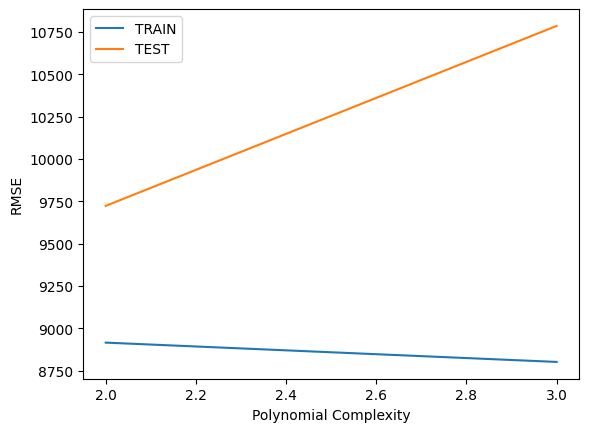

In [23]:
# انتخاب دو ستون اول برای X
X_selected = X[:, [0, 1]]
# خطاهای آموزش و آزمون برای هر درجه
train_rmse_errors = []
test_rmse_errors = []
# تعریف بازه درجات
degrees = [2, 3]

for degree in degrees:
    # تبدیل ویژگی‌ها به چندجمله‌ای درجه "degree"
    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_converter.fit_transform(X_selected)
    # تقسیم داده‌ها به مجموعه‌های آموزش و آزمون
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=101)
    # آموزش مدل روی مجموعه آموزش
    model = LinearRegression()
    model.fit(X_train, y_train)
    # پیش‌بینی روی هر دو مجموعه آموزش و آزمون
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    # محاسبه خطاها
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    # ذخیره خطاها برای رسم نمودار در آینده
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

# رسم نمودار خطاها
plt.plot(degrees, train_rmse_errors, label='TRAIN')
plt.plot(degrees, test_rmse_errors, label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
plt.show()